In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import xml.etree.ElementTree as ET
import os,glob,sys
import pylheV

sns.set() #Set style
sns.set_style('ticks',{'font.family':'serif', 'font.serif':'Times New Roman'})
sns.set_context('paper', font_scale=5.5)
sns.set_palette(sns.color_palette("mako"))

In [2]:
particlesDict = {}


In [3]:
with open("particlesLatex.xml") as f:
    xmlStr = f.read()
    xmlStr = "<root>\n" + xmlStr[:] + "</root>" 
root = ET.fromstring(xmlStr)

In [4]:
for particle in root:
    particleData  = particle.attrib
    pid = int(particleData['id'])
    particlesDict[pid] = {}
    for attr,val in particle.attrib.items():
        try:
            particlesDict[pid][attr] = eval(val) #Try to evaluate attribute
        except:
            particlesDict[pid][attr] = val

In [5]:
#This function remove repeated elements
def rm_repeated_p(vector):
    
    d = []
    out = []
    for i in vector: 
        if i[0] not in d: 
            d.append(i[0])
            out.append(i)
   
    return out

In [6]:
#This functions creates a vector with all generations of a initial particle and give a position for each element
def generationsWposition(particles,y0,initial_index,delta_daughters,delta):
    
    lines = []
    name = particlesDict[abs(e.particles[initial_index].id)]['name']
    if e.particles[initial_index].id < 0:
        if name[len(name)-1] == "+":
            name.replace("+", "-")
        elif name[len(name)-1] == "-":
            name = name.replace("-", "+")
        else:
            name = name + "~"

    gen = [[(initial_index,y0,0,name)],[]]
    #While all of daughters arent final the function searchs for daughters.
    k = 1
    out = False
    while(out == False):
        new_gen = []
        y = y0
        for i in range(len(gen[k-1])):
            #Verifing if the particle isnt final
            if particles[gen[k-1][i][0]].status < 0:
                #Getting the particle's daughters
                daughters = particles[gen[k-1][i][0]].daughters
        
                for j,d in enumerate(daughters):
                
                    pdg_id = particlesDict[abs(e.particles[d].id)]['name']
                    if e.particles[d].id < 0:
                        name = particlesDict[abs(e.particles[d].id)]['antiName']
                    else:
                        name = particlesDict[abs(e.particles[d].id)]['name']
                        
                    new_gen+=[(d,y,i,name)]
                    y = y-delta_daughters
                y = y - delta
                
                        
            #If the particle is final:
            else:
                #Storing the particle in the next generation
                new_gen += [(gen[k-1][i][0],y,i,gen[k-1][i][3])]
                y = y - delta
        #Removing repeated elements
        new_gen = rm_repeated_p(new_gen)
        #print(new_gen)
        #Adding the new generation to the generation vector
        gen[k] += new_gen
        #Verifing if all particles are final
        if all_final(gen[k], particles) == True:
            #It is the last generation
            out = True
        else:
            #Goes to the next generation
            gen.append([])
            k = k + 1
    
    #Removing the empty element
    #gen.pop(len(gen)-1)
            
    return gen
            

    

In [7]:
#This function verifies if all particles in the generation are final
def all_final(gen, particles):
    
    for i in gen:
        
        if particles[i[0]].status < 0:
            return False
        
    return True

In [42]:
colours = ['black', 'black']

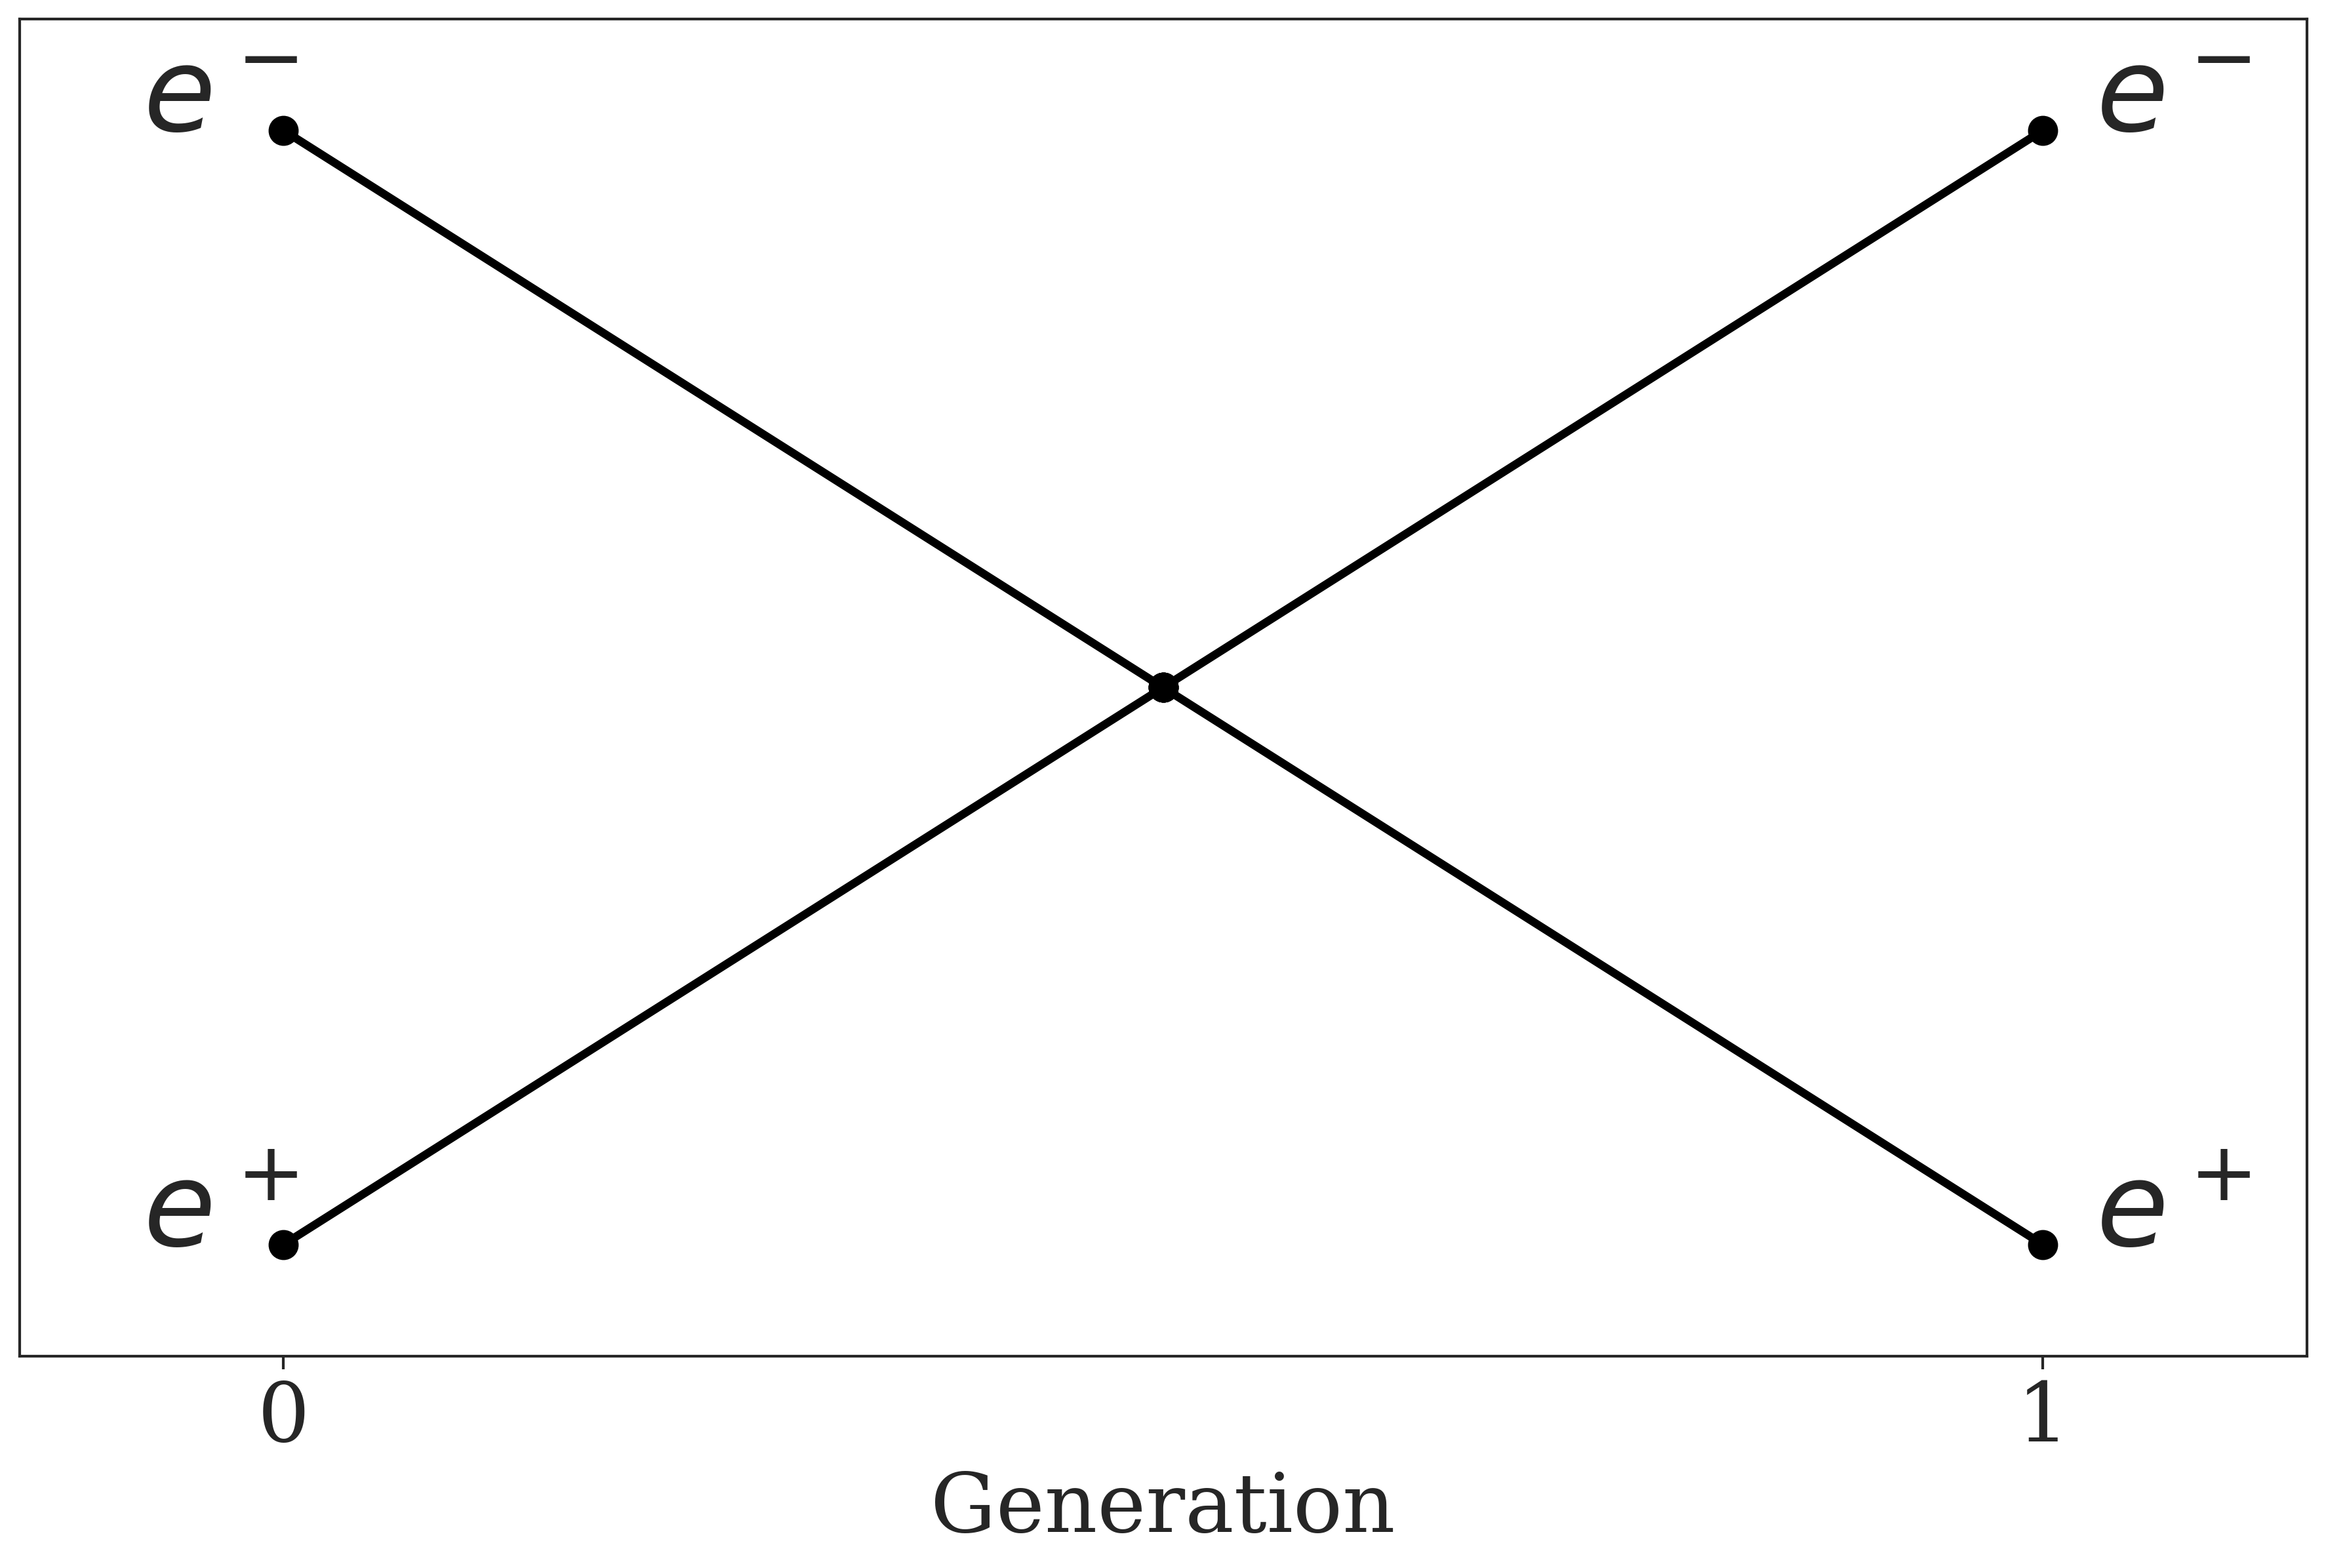

In [51]:
#Plot of the parton level of e+ e- -> e+ e-

fig = plt.figure(figsize = [15,9], dpi = 300)

#first labels and lines
plt.annotate(r'$e^-$',(-0.08,10000),zorder = 5,fontsize=43)
plt.annotate(r'$e^+$',(-0.08,9500),zorder = 5,fontsize=43)
plt.plot([0,0.5],[10000,9750], marker = 'o', zorder = 0, color = colours[0],linewidth = 3, ms = 10)
plt.plot([0,0.5],[9500,9750], marker = 'o', zorder = 0, color = colours[0], linewidth = 3, ms = 10)


#second lines and labels
plt.plot([0.5,1],[9750,10000], marker = 'o',zorder = 0, color = colours[1], linewidth = 3, ms = 10)
plt.annotate(r'$e^-$',(1.03,10000),zorder = 5,fontsize=43)
plt.plot([0.5,1],[9750,9500], marker = 'o', zorder = 0, color = colours[1], linewidth = 3, ms = 10)
plt.annotate(r'$e^+$',(1.03,9500),zorder = 5,fontsize=43)


#plt.yscale('log')
plt.tick_params(labelleft=False, left=False)
plt.xticks(range(0,2), fontsize = 30)
plt.xlim([-0.15,1.15])
plt.ylim([9450,10050])
plt.xlabel('Generation', fontsize = 30)
plt.savefig('epem_scattering.pdf')
plt.show()